In [ ]:
# Zhoomart Koshoybekov AIN-2-21

In [ ]:
### Лабораторная работа №5
### Изучение моделей классификации и регрессии.
### Цель работы: ⦁	Изучите материал, представленный в разделе Ход работы.
### load_diabetes(*[, return_X_y, as_frame])	Загрузите и верните набор данных диабета (регрессия).
### load_linnerud(*[, return_X_y, as_frame])	Загрузите и верните набор данных linnerud физических упражнений.
### ⦁	 Подключите датасеты моделей регрессии:
### ⦁	Изучите подключенные данные.
### ⦁	Постройте модели регрессии (KNeighborsRegressor, LinearRegression, Ridge, Lasso, LogisticRegression) для полученных датасетов, описанные в Ходе работы. 
### ⦁	Настройте наилучшие параметры моделей.
### ⦁	Сравните результаты и сделайте выводы.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.linear_model import LinearRegression
import mglearn.datasets

In [ ]:
## Набор данных по диабету 

In [6]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(f"Форма массива data для набора diabetes: {diabetes.data.shape}")

Форма массива data для набора diabetes: (442, 10)


In [7]:
print(f"Ключи diabetes : {diabetes.keys()}")

Ключи diabetes : dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [8]:
print(diabetes["DESCR"] [:1500] + '/n....')


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
print(f'Имена признаков: {diabetes.feature_names}')

Имена признаков: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [8]:
## Метод KNeighborsRegressor

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, 0:100000]  # Select the 50th feature

y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create and fit the KNeighborsRegressor model
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [11]:
print(f'Прогнозы для тестового набора: {reg.predict(X_test)}')

Прогнозы для тестового набора: [247.33333333 181.66666667 158.33333333 116.66666667 185.66666667
 222.66666667  81.         218.66666667 163.         270.33333333
 167.66666667 197.66666667 133.33333333  68.33333333 294.
  60.         132.33333333  70.33333333 123.         249.66666667
 207.33333333 155.33333333 167.         108.66666667 203.
 190.33333333 101.66666667  65.33333333 189.33333333 186.33333333
 229.          63.66666667 176.33333333 222.          88.66666667
 161.66666667 190.33333333 110.66666667 118.33333333 161.33333333
 157.         155.33333333 151.66666667 206.66666667 145.
  66.66666667 118.33333333 100.66666667 140.33333333 219.
 116.33333333  77.         204.33333333 124.         275.33333333
 136.66666667 145.66666667 111.33333333 110.66666667 215.33333333
 178.33333333  89.33333333 135.         113.         270.66666667
 162.66666667  57.66666667 284.33333333 196.          84.33333333
 131.33333333 169.33333333  80.         110.33333333 166.33333333
 126.333333

In [12]:
print(f"{reg.score(X_test,y_test)}")

0.1475311393015417


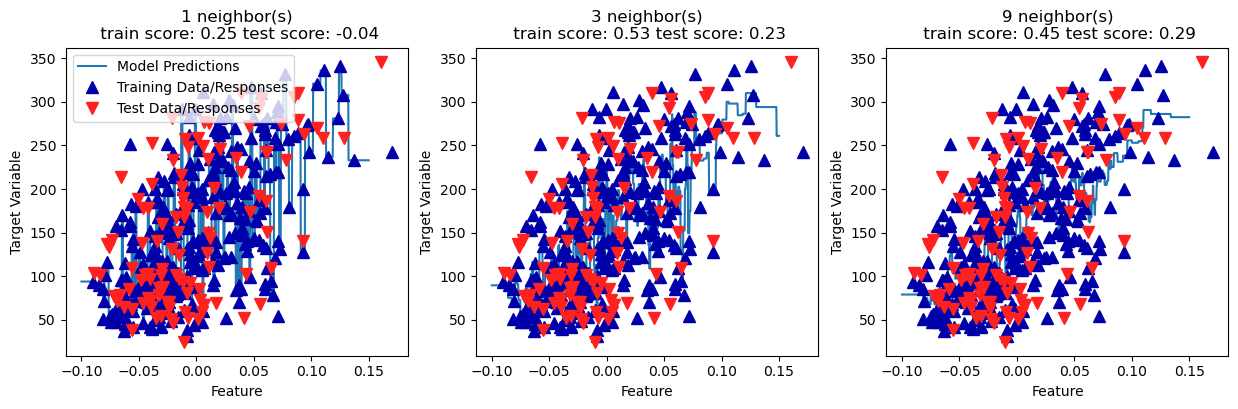

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data[:, 2:3], diabetes.target, random_state=66)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-0.1, 0.15, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test))
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target Variable")

axes[0].legend(["Model Predictions", "Training Data/Responses", "Test Data/Responses"], loc="best")

plt.show()


In [ ]:
## Линейные модели регрессии

In [14]:
from sklearn.linear_model import LinearRegression
X = diabetes.data[:, 0:100000]  # Select the 50th feature
y = diabetes.target

# Split the data into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)


In [15]:
print(f"lr.coef :{lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")


lr.coef :[  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
lr.intercept_: 151.6651755919933


In [16]:

print(f'{lr.score(X_train, y_train)}')
print(f'{lr.score(X_test, y_test)}')


0.519034189167905
0.4849058889476753


In [17]:
#Грибы
from sklearn.linear_model import Ridge
X = diabetes.data  # Select the 50th feature
y = diabetes.target

# Split the data into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0)
ridge = Ridge().fit(X_train, y_train)
print(f"Правильность на обучающем наборе :{ridge.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе :{ridge.score(X_test, y_test)}")


Правильность на обучающем наборе :0.46254203701883423
Правильность на тестовом наборе :0.3569596077458861


In [18]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"Правильность на обучающем наборе :{ridge01.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе :{ridge01.score(X_test, y_test)}")

Правильность на обучающем наборе :0.5502014591285381
Правильность на тестовом наборе :0.3690250543749982


In [19]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"Правильность на обучающем наборе :{ridge10.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе :{ridge10.score(X_test, y_test)}")

Правильность на обучающем наборе :0.17131356091679695
Правильность на тестовом наборе :0.14333099992172604


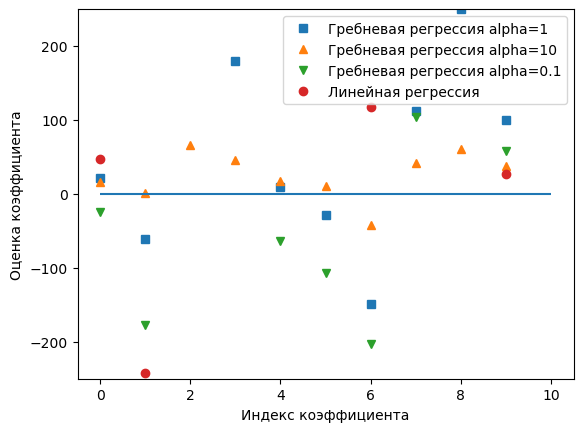

In [20]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-250, 250)
plt.legend()

In [21]:
#Lasso
from sklearn.linear_model import Lasso

# Create an instance of the Logreg model and then fit it
lasso = Lasso()  # You need to specify the alpha (regularization strength) here
lasso.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso.coef_ != 0)}")


Правильность на обучающем наборе: 0.4141235090721286
Правильность на тестовом наборе: 0.2781807594434089
Количество использованных признаков: 2


In [22]:
lasso001 = Lasso(alpha=0.01, max_iter=1000000) # You need to specify the alpha (regularization strength) here
lasso001.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso001.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso001.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso001.coef_ != 0)}")

Правильность на обучающем наборе: 0.5546176295142069
Правильность на тестовом наборе: 0.354122216566946
Количество использованных признаков: 9


In [23]:
lasso0001 = Lasso(alpha=0.0001, max_iter=1000000)  # You need to specify the alpha (regularization strength) here
lasso0001.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso0001.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso0001.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso0001.coef_ != 0)}")

Правильность на обучающем наборе: 0.55543358531947
Правильность на тестовом наборе: 0.35934491978267213
Количество использованных признаков: 10


Text(0, 0.5, 'Оценка коэффициента')

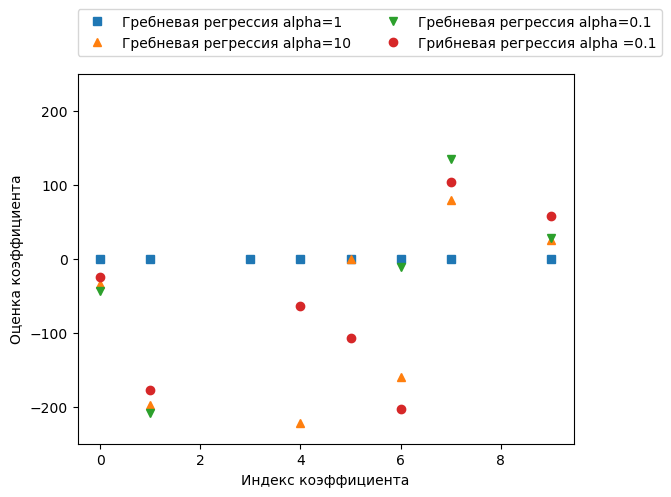

In [24]:
plt.plot(lasso.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(lasso001.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(lasso0001.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(ridge01.coef_, 'o', label="Грибневая регрессия alpha =0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-250, 250)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

In [25]:
from sklearn.linear_model import LogisticRegression
#Logreg
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Calculate and print the accuracy on the training and testing data
train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

print(f"Accuracy on the training set: {train_accuracy}")
print(f"Accuracy on the testing set: {test_accuracy}")


Accuracy on the training set: 0.03323262839879154
Accuracy on the testing set: 0.009009009009009009


In [26]:
logreg100 = LogisticRegression(C=100)
logreg100.fit(X_train, y_train)

# Calculate and print the accuracy on the training and testing data
train_accuracy = logreg100.score(X_train, y_train)
test_accuracy = logreg100.score(X_test, y_test)

print(f"Accuracy on the training set: {train_accuracy}")
print(f"Accuracy on the testing set: {test_accuracy}")

Accuracy on the training set: 0.1782477341389728
Accuracy on the testing set: 0.009009009009009009


In [27]:
logreg001 = LogisticRegression(C=0.01)
logreg001.fit(X_train, y_train)

# Calculate and print the accuracy on the training and testing data
train_accuracy = logreg001.score(X_train, y_train)
test_accuracy = logreg001.score(X_test, y_test)

print(f"Accuracy on the training set: {train_accuracy}")
print(f"Accuracy on the testing set: {test_accuracy}")

Accuracy on the training set: 0.030211480362537766
Accuracy on the testing set: 0.009009009009009009


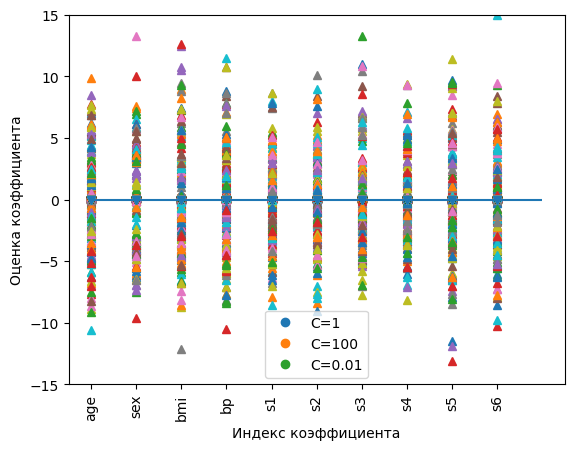

In [28]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(logreg.coef_.T, 'o')
plt.plot(logreg100.coef_.T, '^')
plt.plot(logreg001.coef_.T, 'v')
plt.xticks(np.arange(diabetes.data.shape[1]), diabetes.feature_names, rotation=90)
plt.hlines(0, 0, diabetes.data.shape[1])
plt.ylim(-15, 15)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend(['C=1', 'C=100', 'C=0.01'])
plt.show()


In [ ]:
## Набор данных физических упражнений


In [29]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
print(f"Форма массива data для набора diabetes: {linnerud.data.shape}")

Форма массива data для набора diabetes: (20, 3)


In [30]:
print(f"Ключи diabetes : {linnerud.keys()}")

Ключи diabetes : dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [31]:
print(f'Имена признаков: {linnerud.feature_names}')

Имена признаков: ['Chins', 'Situps', 'Jumps']


In [32]:
print(linnerud["DESCR"] [:1500] + '/n....')

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.
/n....


In [33]:
X = linnerud.data  # Make sure X has the correct number of features
y = linnerud.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Number of features in linnerud.data:", linnerud.data.shape[1])


Number of features in linnerud.data: 3


In [34]:
## Линейная модель регрессии (метод наименьших квадратов)

In [35]:
from sklearn.linear_model import LinearRegression
lrr = LinearRegression().fit(X_train, y_train)

In [36]:
print(f"lr.coef :{lrr.coef_}")
print(f"lr.intercept_: {lrr.intercept_}")

lr.coef :[[ 0.45032944 -0.31848005  0.09103322]
 [-0.07820805 -0.04851095  0.02797324]
 [-0.48276697  0.09321505 -0.05008643]]
lr.intercept_: [210.17957378  40.92073283  52.01086926]


In [37]:
print(f'{lrr.score(X_train, y_train)}')
print(f'{lrr.score(X_test, y_test)}')

0.3723816427035915
-1.3504115542086357


In [38]:
from sklearn.linear_model import Ridge
ridgee = Ridge().fit(X_train,y_train)
print(f"{ridgee.score(X_train,y_train)}")
print(f"{ridgee.score(X_test,y_test)}")


0.37238106176377334
-1.3467840202317163


In [39]:
ridgee10 = Ridge(alpha=10).fit(X_train,y_train)
print(f"{ridgee10.score(X_train,y_train)}")
print(f"{ridgee10.score(X_test,y_test)}")

0.37232880018109116
-1.3160818062747246


In [40]:
ridgee01 = Ridge(alpha=0.1).fit(X_train,y_train)
print(f"{ridgee01.score(X_train,y_train)}")
print(f"{ridgee01.score(X_test,y_test)}")

0.3723816368374091
-1.350046734349969


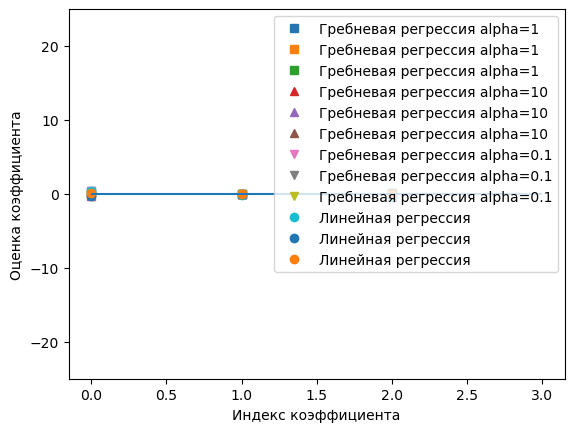

In [41]:
plt.plot(ridgee.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridgee10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridgee01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lrr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lrr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

In [42]:
#Lasso
from sklearn.linear_model import Lasso

# Create an instance of the Logreg model and then fit it
lasso = Lasso()  # You need to specify the alpha (regularization strength) here
lasso.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso.coef_ != 0)}")

Правильность на обучающем наборе: 0.3695371044216506
Правильность на тестовом наборе: -1.2886357738257606
Количество использованных признаков: 8


In [43]:
lasso001 = Lasso(alpha=0.01, max_iter=1000000)  # You need to specify the alpha (regularization strength) here
lasso001.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso001.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso001.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso001.coef_ != 0)}")

Правильность на обучающем наборе: 0.37238134989686245
Правильность на тестовом наборе: -1.349623993278015
Количество использованных признаков: 9


In [44]:
lasso0001 = Lasso(alpha=0.0001, max_iter=1000000)  # You need to specify the alpha (regularization strength) here
lasso0001.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso0001.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso0001.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso0001.coef_ != 0)}")

Правильность на обучающем наборе: 0.37238164267469936
Правильность на тестовом наборе: -1.3504035835281147
Количество использованных признаков: 9


Text(0, 0.5, 'Оценка коэффициента')

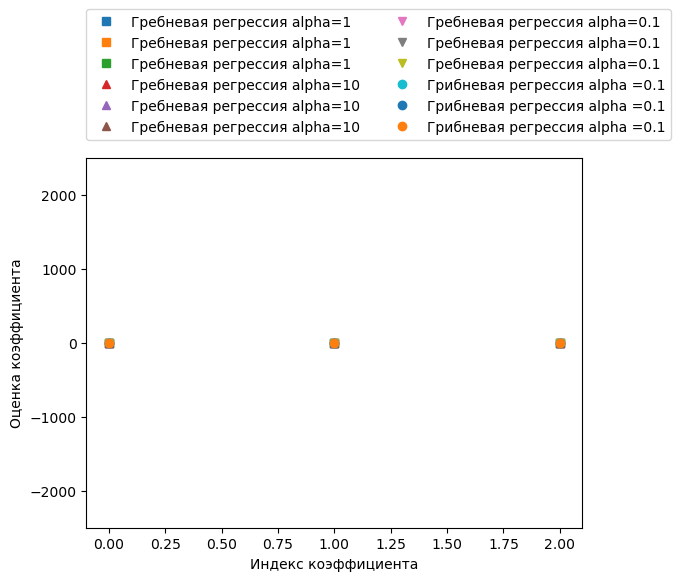

In [45]:
plt.plot(lasso.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(lasso001.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(lasso0001.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(ridgee01.coef_, 'o', label="Грибневая регрессия alpha =0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-2500, 2500)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

In [46]:
X = linnerud.data  # Make sure X has the correct number of features
y = linnerud.target
y_1d = y[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y_1d, test_size=0.2, random_state=42)
y_1d

array([36., 37., 38., 35., 35., 36., 38., 34., 31., 33., 34., 33., 34.,
       46., 36., 37., 37., 32., 33., 33.])

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train, y_train)

# Calculate and print the accuracy on the training and testing data
train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

print(f"Accuracy on the training set: {train_accuracy}")
print(f"Accuracy on the testing set: {test_accuracy}")

Accuracy on the training set: 0.8125
Accuracy on the testing set: 0.0


In [48]:
logreg100 = LogisticRegression(C=1, max_iter=1000000)
logreg100.fit(X_train, y_train)

# Calculate and print the accuracy on the training and testing data
train_accuracy = logreg100.score(X_train, y_train)
test_accuracy = logreg100.score(X_test, y_test)

print(f"Accuracy on the training set: {train_accuracy}")
print(f"Accuracy on the testing set: {test_accuracy}")

Accuracy on the training set: 0.8125
Accuracy on the testing set: 0.0


In [49]:
logreg001 = LogisticRegression(C=0.01,max_iter=100000)
logreg001.fit(X_train, y_train)

# Calculate and print the accuracy on the training and testing data
train_accuracy = logreg001.score(X_train, y_train)
test_accuracy = logreg001.score(X_test, y_test)

print(f"Accuracy on the training set: {train_accuracy}")
print(f"Accuracy on the testing set: {test_accuracy}")

Accuracy on the training set: 0.6875
Accuracy on the testing set: 0.0


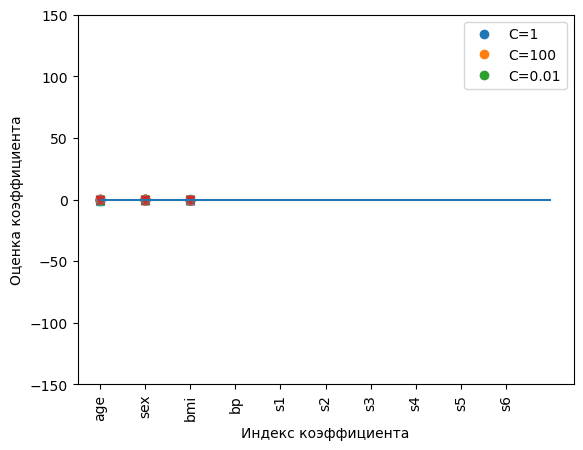

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(logreg.coef_.T, 'o')
plt.plot(logreg100.coef_.T, '^')
plt.plot(logreg001.coef_.T, 'v')
plt.xticks(np.arange(diabetes.data.shape[1]), diabetes.feature_names, rotation=90)
plt.hlines(0, 0, diabetes.data.shape[1])
plt.ylim(-150, 150)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend(['C=1', 'C=100', 'C=0.01'])
plt.show()